# Jul 16th, 2022 (cbar for figs)

**Motivation**: <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Figs_Cbar'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Figs_Cbar

## Prepare (512)

In [3]:
mice = Mice(nn)
kws_fig['dpi'] = 600

### Fig6_Mem

In [4]:
from figures.fig_mem import mk_member_cmap
spectral, accent = mk_member_cmap()

#### Spectral

In [5]:
mu_vals = [0.05, 0.1, 0.25, 0.50]

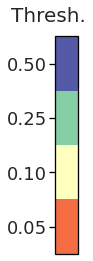

In [6]:
fig, cax, cbar = cbar_only(spectral, edgecolor='k', tick_position='left')
cax.set_title('Thresh.', fontsize=20, y=1.04, x=-0.3, rotation=0)
cax.tick_params(labelsize=18)
cax.yaxis.set(
    ticks=[(i + 0.5) / len(mu_vals) for i in range(len(mu_vals))],
    ticklabels=[f"{mu:0.02f}" for mu in mu_vals],
)
fig.savefig(pjoin(fig_dir, f'spect.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'spect.pdf'), **kws_fig)
fig

#### Accent

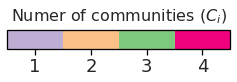

In [7]:
fig, cax, cbar = cbar_only(accent, vertical=False)
cax.set_title('Numer of communities ($C_i$)', y=1.2, fontsize=16)
cax.tick_params(labelsize=18)
cax.xaxis.set(
    ticks=[(i + 0.5) / 4 for i in range(4)],
    ticklabels=range(1, 4 + 1),
)
fig.savefig(pjoin(fig_dir, f'accent.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'accent.pdf'), **kws_fig)
fig

## Fig3/4_OCs

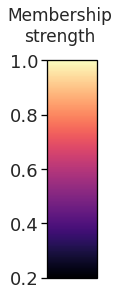

In [8]:
fig, cax, cbar = cbar_only('magma', vmin=0.2, vmax=1.0, figsize=(0.9, 4), tick_position='left')
cax.set_title('Membership\nstrength', fontsize=17, y=1.06, x=0.25, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'magma.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'magma.pdf'), **kws_fig)
fig

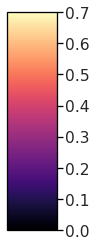

In [9]:
fig, cax, cbar = cbar_only('magma', vmin=0.0, vmax=0.7, figsize=(0.9, 4), tick_position='right')
# cax.set_title('Membership\nstrength', fontsize=17, y=1.06, rotation=0)
cax.tick_params(labelsize=15.5)

fig.savefig(pjoin(fig_dir, f'magma20.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'magma20.pdf'), **kws_fig)
fig

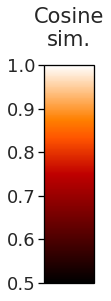

In [10]:
fig, cax, cbar = cbar_only('gist_heat', vmin=0.5, vmax=1.0, figsize=(0.9, 4), tick_position='left')
cax.set_title('Cosine\nsim.', fontsize=21, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'gist_heat.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'gist_heat.pdf'), **kws_fig)
fig

## Perm test

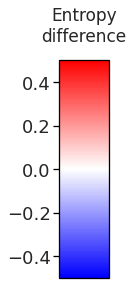

In [34]:
bwr = sns.color_palette('bwr', as_cmap=True)

fig, cax, cbar = cbar_only(bwr, vmin=-0.5, vmax=0.5, figsize=(0.9, 4), tick_position='left')
cax.set_title('Entropy\ndifference', fontsize=17, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'bwr.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'bwr.pdf'), **kws_fig)
fig

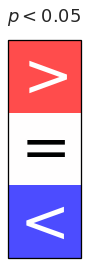

In [35]:
from figures.fig_deg import cbar_perm_test
fig, cax, cbar = cbar_perm_test([bwr(0.15), bwr(0.5), bwr(0.85)])
cax.set_title(r'$p < 0.05$', fontsize=18, y=1.06, rotation=0)

fig.savefig(pjoin(fig_dir, f'perm.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'perm.pdf'), **kws_fig)
fig

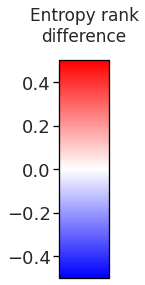

In [36]:
bwr = sns.color_palette('bwr', as_cmap=True)

fig, cax, cbar = cbar_only(bwr, vmin=-0.5, vmax=0.5, figsize=(0.9, 4), tick_position='left')
cax.set_title('Entropy rank\ndifference', fontsize=17, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'bwr_rank.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'bwr_rank.pdf'), **kws_fig)
fig

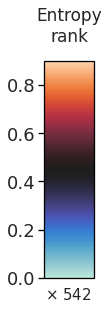

In [37]:
bwr = sns.color_palette('icefire', as_cmap=True)

fig, cax, cbar = cbar_only(bwr, vmin=0, vmax=0.9, figsize=(0.9, 4), tick_position='left')
cax.set_title('Entropy\nrank', fontsize=17, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

cax.text(
    x=0.01,
    y=-0.09,
    s=r'$\times \,\, 542$',
    fontsize=15,
)

fig.savefig(pjoin(fig_dir, f'ent_rank.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'ent_rank.pdf'), **kws_fig)
fig

## Percentile

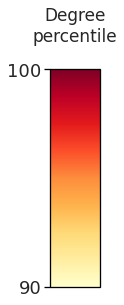

In [14]:
fig, cax, cbar = cbar_only('YlOrRd', vmin=90, vmax=100, figsize=(0.9, 4), tick_position='left')
cax.set_title('Degree\npercentile', fontsize=17, y=1.1, rotation=0)
cax.yaxis.set_ticks([90, 100])
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'percentile_deg.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'percentile_deg.pdf'), **kws_fig)
fig

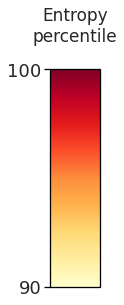

In [15]:
fig, cax, cbar = cbar_only('YlOrRd', vmin=90, vmax=100, figsize=(0.9, 4), tick_position='left')
cax.set_title('Entropy\npercentile', fontsize=17, y=1.1, rotation=0)
cax.yaxis.set_ticks([90, 100])
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'percentile_ent.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'percentile_ent.pdf'), **kws_fig)
fig